In [86]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [87]:
from sklearn.preprocessing import OrdinalEncoder
filename_train = "/kaggle/input/titanic/train.csv"
filename_test = "/kaggle/input/titanic/test.csv"
filename = "/kaggle/input/titanic/gender_submission.csv"

df_train = pd.read_csv(filename_train, index_col='PassengerId')
df_test = pd.read_csv(filename_test, index_col='PassengerId')
valid_test = pd.read_csv(filename, index_col='PassengerId')

In [88]:
# df_train.head()
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [89]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [90]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [91]:
df_train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [92]:
df_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [93]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


<Axes: xlabel='Pclass', ylabel='Survived'>

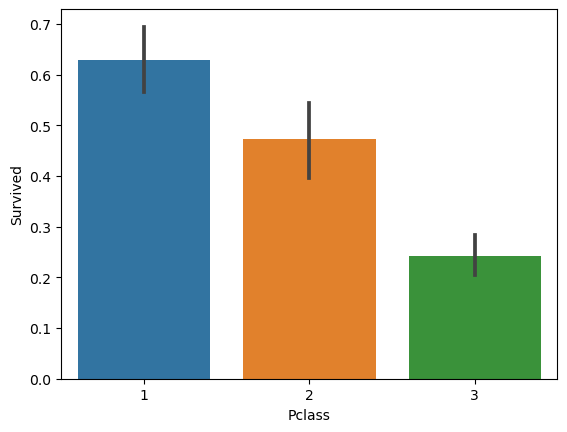

In [94]:
sns.barplot(x='Pclass', y='Survived', data=df_train)

<Axes: xlabel='Sex', ylabel='Survived'>

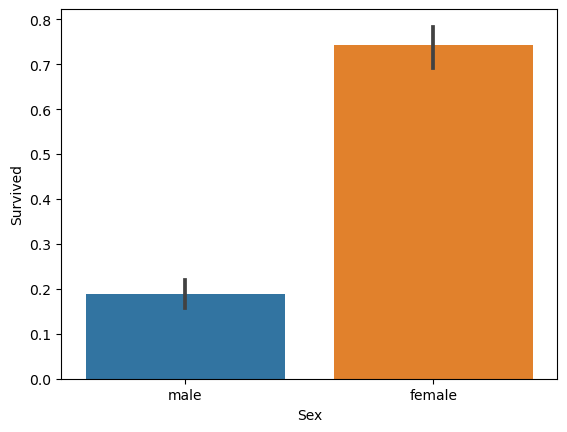

In [95]:
sns.barplot(x='Sex', y='Survived', data=df_train)

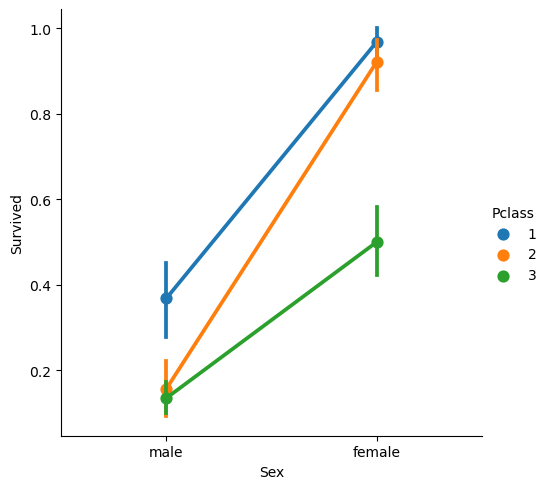

In [96]:
sns.catplot(x='Sex', y='Survived', hue='Pclass', kind='point', data=df_train)

<Axes: xlabel='Pclass'>

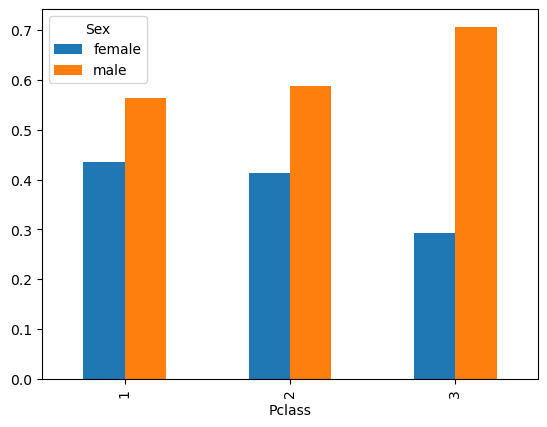

In [97]:
cross_tab_df = pd.crosstab(df_train['Pclass'], df_train['Sex'])
cross_tab_df.div(cross_tab_df.sum(1), axis=0).plot(kind='bar')

In [98]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    sns.barplot(x=ms.index,y=ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Percent', fontsize=12)
    plt.title('Percent missing data', fontsize=12)
    return ms


,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


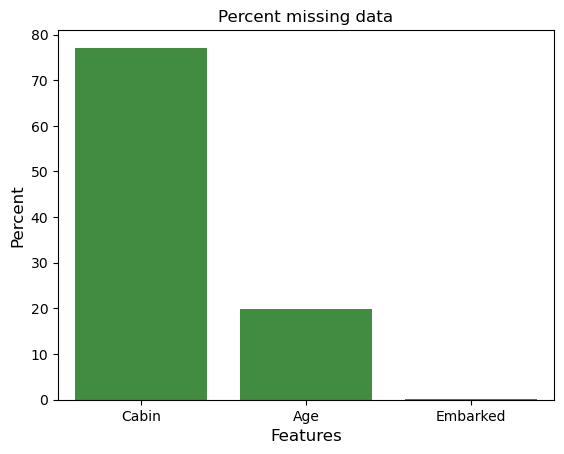

In [100]:
missingdata(df_train)

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


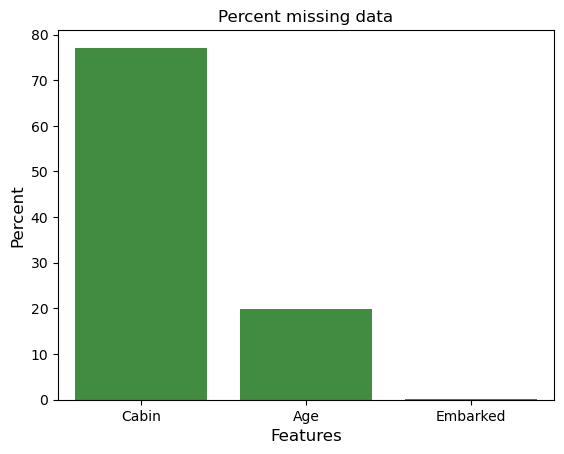

In [101]:
missingdata(df_train)

In [102]:
df_test = pd.concat([df_test, valid_test], axis=1)

for ds in [df_test, df_train]:
    ds.drop('Cabin', axis=1, inplace=True)
    ds.drop('Name', axis=1, inplace=True)
    ds.drop('Ticket', axis=1, inplace=True)
    ds['Age'].fillna(ds['Age'].median(), inplace = True)


df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace = True)
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace = True)



In [103]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [104]:
ds.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [105]:
for ds in [df_test, df_train]:
    ds['Age_bin'] = pd.cut(ds['Age'], bins=[0,12,20,40,120], labels=['Kid','Young','Adult','Old'])

for ds in [df_test, df_train]:
    ds['Fare_bin'] = pd.cut(ds['Fare'], bins=[0, 7.89, 14.45, 31.5, 513], labels=['low_fare','median_fare', 'above_avg', 'high_fare'])
    
for ds in [df_test, df_train]:
    ds.drop('Age', axis=1, inplace=True)
    ds.drop('Fare', axis=1, inplace=True)

In [106]:
df_train_y = df_train.Survived
df_train_X = df_train.drop("Survived", axis=1)

df_test_y = df_test.Survived
df_test_X = df_test.drop("Survived", axis=1)
df_test_X.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age_bin,Fare_bin
PassengerId,,,,,,,
892,3,male,0,0,Q,Adult,low_fare
893,3,female,1,0,S,Old,low_fare
894,2,male,0,0,Q,Old,median_fare
895,3,male,0,0,S,Adult,median_fare
896,3,female,1,1,S,Adult,median_fare


In [107]:
from sklearn.preprocessing  import OneHotEncoder 

encoder = OneHotEncoder()

s = (df_test.dtypes != ('int64'))
categorial_column = list(s[s].index)


encoded_data_train = encoder.fit_transform(df_train_X[categorial_column]).toarray()
encoded_data_test = encoder.transform(df_test_X[categorial_column]).toarray()



encoded_train_df = pd.DataFrame(encoded_data_train, columns=encoder.get_feature_names_out(df_train_X[categorial_column].columns), index=df_train.index)
encoded_test_df = pd.DataFrame(encoded_data_test, columns=encoder.get_feature_names_out(df_test_X[categorial_column].columns), index=df_test.index)

encoded_train_df.index = df_train_X.index
encoded_test_df.index = df_test_X.index

df_train_OH = df_train_X.drop(categorial_column, axis=1)
df_train_OH = pd.concat([df_train_OH, encoded_train_df], axis=1)

df_test_OH = df_test_X.drop(categorial_column, axis=1)
df_test_OH = pd.concat([df_test_OH, encoded_test_df], axis=1)

In [108]:
# from sklearn.preprocessing  import OneHotEncoder 

# encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, prefix='Category')
# s = (df_test.dtypes != ('int64'))
# categorial_column = list(s[s].index)

# OH_cols_train = pd.DataFrame(encoder.fit_transform(df_train[categorial_column]))
# OH_cols_test = pd.DataFrame(encoder.transform(df_test[categorial_column]))

# OH_cols_train.index = df_train.index
# OH_cols_test.index = df_test.index

# num_X_train = df_train.drop(categorial_column, axis=1)
# num_X_test = df_test.drop(categorial_column, axis=1)

# # Add one-hot encoded columns to numerical features
# OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
# OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

# # Ensure all columns have string type
# OH_X_train.columns = OH_X_train.columns.astype(str)
# OH_X_test.columns = OH_X_test.columns.astype(str)

Accurasy:  0.9330143540669856
F-1 score: 0.9090909090909091


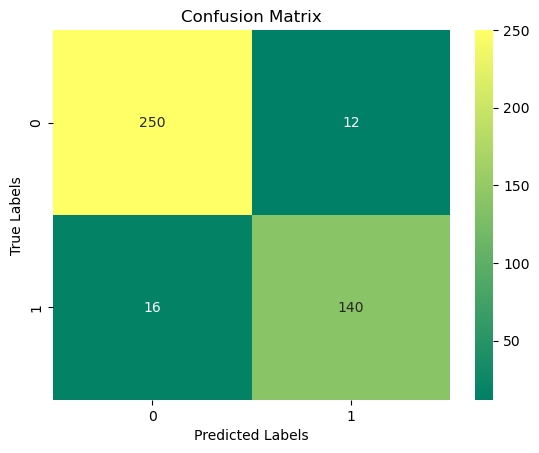

In [109]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression

result_score_ac = {}
result_score_f1 = {}

def LogisticRegress_score_dataset(df_train_x, df_train_y, df_test_x, df_test_y):
    model = LogisticRegression()
    model.fit(df_train_x, df_train_y)
    predicts = model.predict(df_test_x)
    cm = confusion_matrix(predicts, df_test_y)

    sns.heatmap(cm, annot=True, fmt="1.0f", cmap="summer")

    print('Accurasy: ',accuracy_score(predicts,df_test_y))
    print("F-1 score:", f1_score(predicts, df_test_y))

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    
    return accuracy_score(predicts,df_test_y), f1_score(predicts, df_test_y)
    
#     return preds, mean_absolute_error(y_valid, preds)

result_score_ac['LogisticRegression'], result_score_f1['LogistiocRegression'] = LogisticRegress_score_dataset(df_train_OH, df_train_y, df_test_OH, df_test_y)





quantiti n_estimator: 10
Accurasy:  0.8732057416267942
F-1 score: 0.830670926517572


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


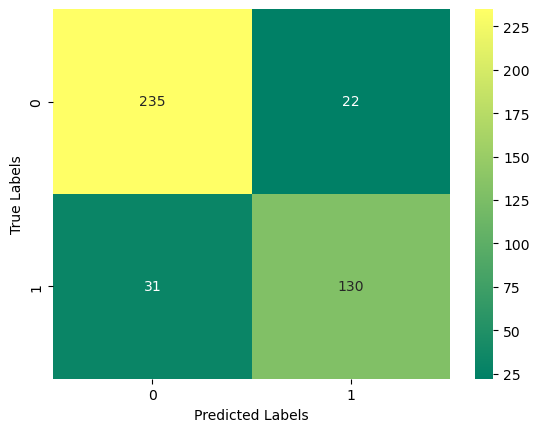

------------------------------------------------------------------------------------------------------------------------------------------------------
quantiti n_estimator: 50


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accurasy:  0.8875598086124402
F-1 score: 0.844884488448845


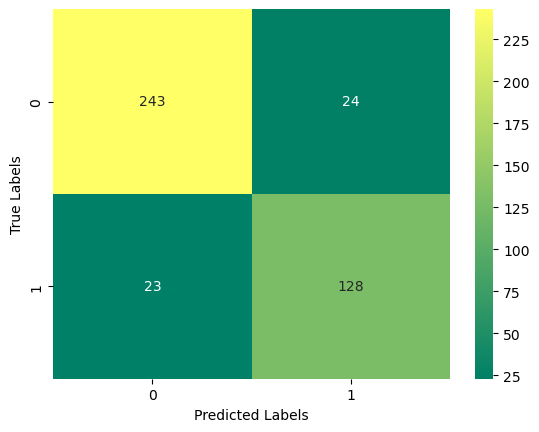

------------------------------------------------------------------------------------------------------------------------------------------------------
quantiti n_estimator: 100


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accurasy:  0.8827751196172249
F-1 score: 0.8393442622950819


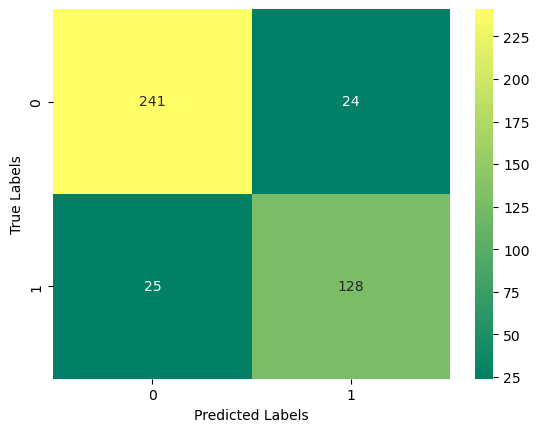

------------------------------------------------------------------------------------------------------------------------------------------------------
quantiti n_estimator: 200


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accurasy:  0.8803827751196173
F-1 score: 0.8366013071895425


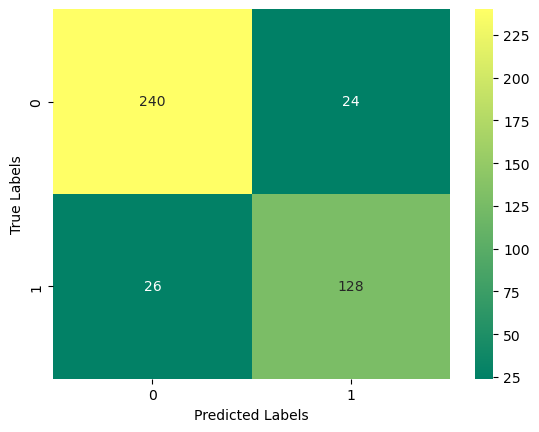

------------------------------------------------------------------------------------------------------------------------------------------------------
quantiti n_estimator: 500


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accurasy:  0.8779904306220095
F-1 score: 0.8327868852459017


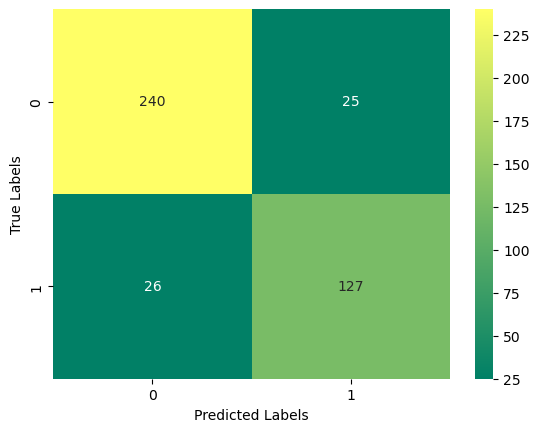

------------------------------------------------------------------------------------------------------------------------------------------------------


In [110]:
from sklearn.ensemble import RandomForestClassifier
def RandomForest_score_dataset(df_train_x, df_train_y, df_test_x, df_test_y, n_estimator=100, min_samples_split=2, min_samples_lead=1):
    model = RandomForestClassifier(criterion='gini', n_estimators=n_estimator,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1)
    model.fit(df_train_x, df_train_y)
    predicts = model.predict(df_test_x)
    
    cm = confusion_matrix(predicts, df_test_y)
    sns.heatmap(cm, annot=True, fmt="1.0f", cmap="summer")

    print('Accurasy: ',accuracy_score(predicts,df_test_y))
    print("F-1 score:", f1_score(predicts, df_test_y))
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    
    plt.show()
    return accuracy_score(predicts,df_test_y), f1_score(predicts, df_test_y)

temp_score_ac = []
temp_score_f1 = []
for num, i in enumerate([10, 50, 100, 200, 500]):
    print(f'quantiti n_estimator: {i}')
    temp_ac, temp_f1 = RandomForest_score_dataset(df_train_OH, df_train_y, df_test_OH, df_test_y, n_estimator=i, min_samples_split=2, min_samples_lead=1)
    temp_score_ac.append(temp_ac)
    temp_score_f1.append(temp_f1)
    print(150*'-')
result_score_ac['RandomForest'] = max(temp_score_ac)
result_score_f1['RandomForest'] = max(temp_score_f1)

Accurasy:  0.8421052631578947
F-1 score: 0.7814569536423841


/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


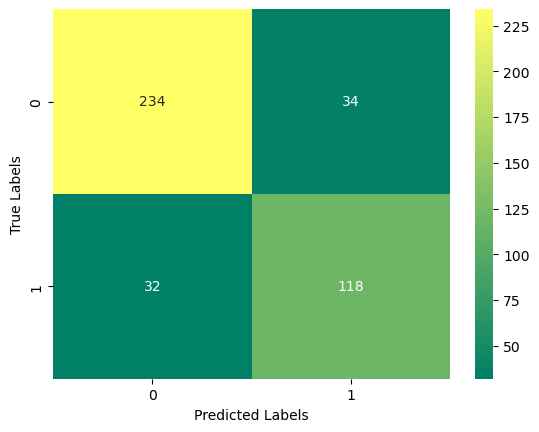

In [111]:
from sklearn.tree import DecisionTreeClassifier

def DecisionTree_score_dataset(df_train_x, df_train_y, df_test_x, df_test_y,  min_samples_split=10, min_samples_leaf=1):
    model= DecisionTreeClassifier(criterion='gini', 
                                 min_samples_split=10,min_samples_leaf=1,
                                 max_features='auto')
    model.fit(df_train_x, df_train_y)
    predicts = model.predict(df_test_x)
    
    cm = confusion_matrix(predicts, df_test_y)
    sns.heatmap(cm, annot=True, fmt="1.0f", cmap="summer")

    print('Accurasy: ',accuracy_score(predicts,df_test_y))
    print("F-1 score:", f1_score(predicts, df_test_y))
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    
    plt.show()
    return accuracy_score(predicts,df_test_y), f1_score(predicts, df_test_y)

result_score_ac['DecisionTree'], result_score_f1['DecisionTree'] = DecisionTree_score_dataset(df_train_OH, df_train_y, df_test_OH, df_test_y, min_samples_split=10, min_samples_leaf=1)


Accurasy:  0.8636363636363636
F-1 score: 0.8106312292358804


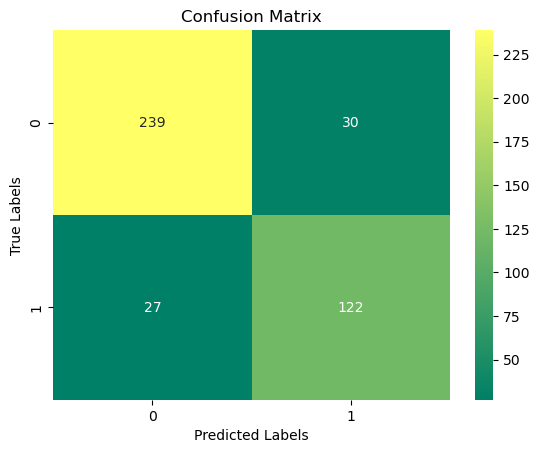

In [112]:
from sklearn.ensemble import GradientBoostingClassifier
def GradientBoosting_score_dataset(df_train_x, df_train_y, df_test_x, df_test_y):
    model = GradientBoostingClassifier()
    model.fit(df_train_x, df_train_y)
    predicts = model.predict(df_test_x)
    cm = confusion_matrix(predicts, df_test_y)

    sns.heatmap(cm, annot=True, fmt="1.0f", cmap="summer")

    print('Accurasy: ',accuracy_score(predicts,df_test_y))
    print("F-1 score:", f1_score(predicts, df_test_y))

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    
    return accuracy_score(predicts,df_test_y), f1_score(predicts, df_test_y)

result_score_ac["GradientBoosting"], result_score_f1["GradientBossting"] = GradientBoosting_score_dataset(df_train_OH, df_train_y, df_test_OH, df_test_y)

Accurasy:  0.84688995215311
F-1 score: 0.8232044198895028


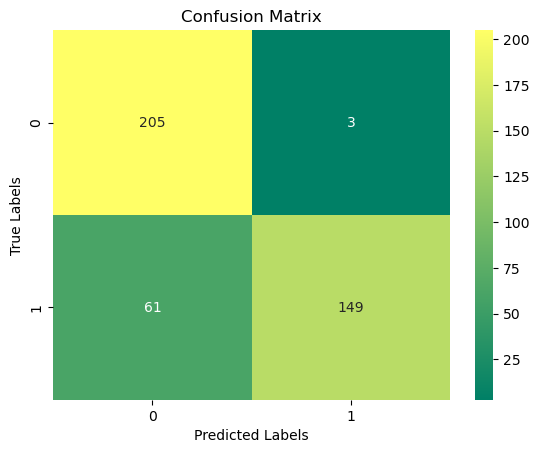

In [113]:
from sklearn.naive_bayes import GaussianNB

def GaussianNB_score_dataset(df_train_x, df_train_y, df_test_x, df_test_y):
    model = GaussianNB()
    model.fit(df_train_x, df_train_y)
    predicts = model.predict(df_test_x)
    cm = confusion_matrix(predicts, df_test_y)

    sns.heatmap(cm, annot=True, fmt="1.0f", cmap="summer")

    print('Accurasy: ',accuracy_score(predicts,df_test_y))
    print("F-1 score:", f1_score(predicts, df_test_y))

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    
    return accuracy_score(predicts,df_test_y), f1_score(predicts, df_test_y)
    
result_score_ac["GaussianNB"], result_score_f1["GaussianNB"] = GaussianNB_score_dataset(df_train_OH, df_train_y, df_test_OH, df_test_y)


Accurasy:  0.8827751196172249
F-1 score: 0.8268551236749117


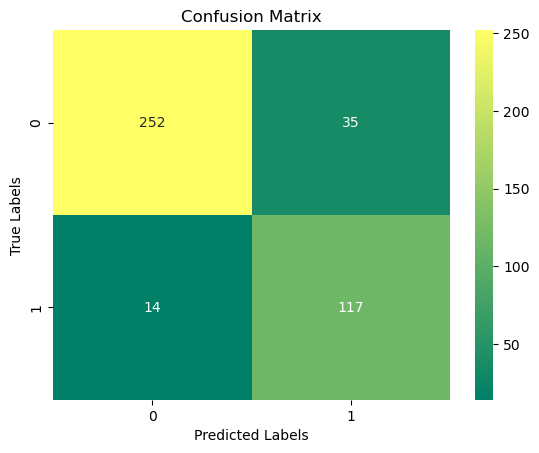

In [114]:
from sklearn.neighbors import KNeighborsClassifier


def KNN_score_dataset(df_train_x, df_train_y, df_test_x, df_test_y):
    model = KNeighborsClassifier(n_neighbors = 4)
    model.fit(df_train_x, df_train_y)
    predicts = model.predict(df_test_x)
    cm = confusion_matrix(predicts, df_test_y)

    sns.heatmap(cm, annot=True, fmt="1.0f", cmap="summer")

    print('Accurasy: ',accuracy_score(predicts,df_test_y))
    print("F-1 score:", f1_score(predicts, df_test_y))

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    
    return accuracy_score(predicts,df_test_y), f1_score(predicts, df_test_y)
    
result_score_ac["KNN"], result_score_f1["KNN"] = KNN_score_dataset(df_train_OH, df_train_y, df_test_OH, df_test_y)


Accurasy:  0.9593301435406698
F-1 score: 0.9446254071661238


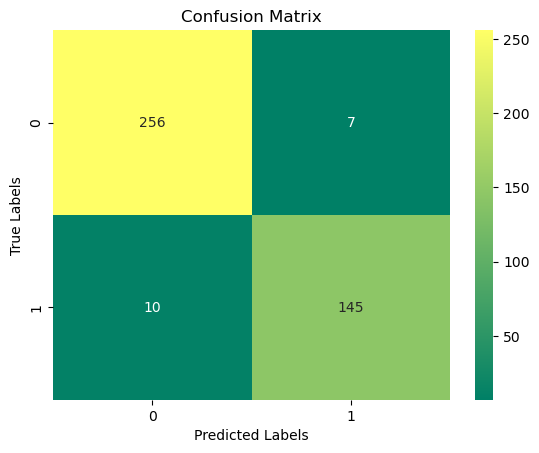

In [115]:
from sklearn.svm import SVC

def SVC_score_dataset(df_train_x, df_train_y, df_test_x, df_test_y):
    model = SVC()
    model.fit(df_train_x, df_train_y)
    predicts = model.predict(df_test_x)
    cm = confusion_matrix(predicts, df_test_y)

    sns.heatmap(cm, annot=True, fmt="1.0f", cmap="summer")

    print('Accurasy: ',accuracy_score(predicts,df_test_y))
    print("F-1 score:", f1_score(predicts, df_test_y))

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    
    return accuracy_score(predicts,df_test_y), f1_score(predicts, df_test_y)
    
result_score_ac["SVC"], result_score_f1["SVC"] = SVC_score_dataset(df_train_OH, df_train_y, df_test_OH, df_test_y)


Accurasy:  0.84688995215311
F-1 score: 0.8232044198895028


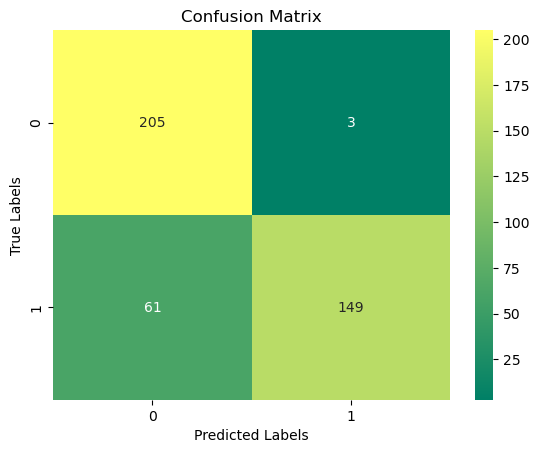

In [116]:
from sklearn.ensemble import AdaBoostClassifier

def AdaB_score_dataset(df_train_x, df_train_y, df_test_x, df_test_y):
    model = GaussianNB()
    model.fit(df_train_x, df_train_y)
    predicts = model.predict(df_test_x)
    cm = confusion_matrix(predicts, df_test_y)

    sns.heatmap(cm, annot=True, fmt="1.0f", cmap="summer")

    print('Accurasy: ',accuracy_score(predicts,df_test_y))
    print("F-1 score:", f1_score(predicts, df_test_y))

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    
    return accuracy_score(predicts,df_test_y), f1_score(predicts, df_test_y)
    
result_score_ac["AdaB"], result_score_f1["AdaB"] = AdaB_score_dataset(df_train_OH, df_train_y, df_test_OH, df_test_y)


In [117]:
model_df = pd.DataFrame({'Model_name': list(result_score_ac.keys()), 'Score_ac': list(result_score_ac.values()), 'Score_F1': list(result_score_f1.values())})
model_df.sort_values(by='Score_ac', ascending=False)


,Model_name,Score_ac,Score_F1
6,SVC,0.959330,0.944625
0,LogisticRegression,0.933014,0.909091
1,RandomForest,0.887560,0.844884
5,KNN,0.882775,0.826855
3,GradientBoosting,0.863636,0.810631
4,GaussianNB,0.846890,0.823204
7,AdaB,0.846890,0.823204
2,DecisionTree,0.842105,0.781457


Accurasy:  0.9593301435406698
F-1 score: 0.9446254071661238


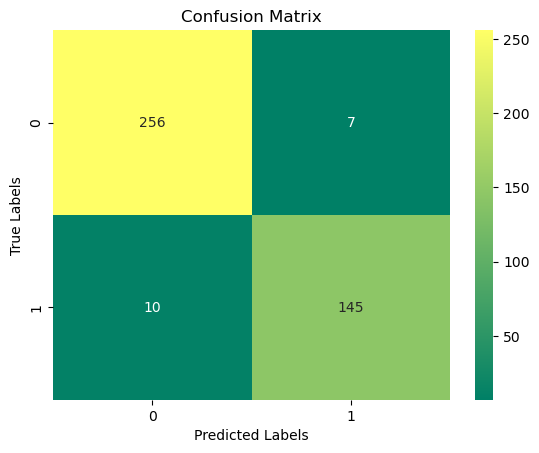

0.9593301435406698 0.9446254071661238


In [118]:
model = SVC()
model.fit(df_train_OH, df_train_y)
predicts = model.predict(df_test_OH)
cm = confusion_matrix(predicts, df_test_y)

sns.heatmap(cm, annot=True, fmt="1.0f", cmap="summer")

print('Accurasy: ',accuracy_score(predicts,df_test_y))
print("F-1 score:", f1_score(predicts, df_test_y))

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print(accuracy_score(predicts,df_test_y), f1_score(predicts, df_test_y))



In [119]:
output = pd.DataFrame({'PassengerId': df_test_y.index,
                       'Survived': predicts})
output.to_csv('submission.csv', index=False)